<a href="https://colab.research.google.com/github/itzem-vg/Practicos-SIS420-COM200/blob/main/LAB5/Punto1OFICIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LAB-5**

### **Punto 1**

###  
* Modificar el generador de dataset aleatorio, para que este pueda generar centroides en cantidades entre 1 y 10, y considerando una importante distancia entre ellos con la finalidad de permitir la verificación visual una vez se realice el entrenamiento del modelo.

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

"""blob_centers = np.array(
    [[ -1.1,  4.0],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-0.5,  1.3],
     [-2.8,  5.0]])

#Desviación Estandar
blob_std = np.array([0.4, 0.3, 0.1, 0.3, 0.1, 0.2])"""
blob_centers = np.random.uniform(low=-10, high=10, size=(8, 2))
# Generar desviaciones estándar para los blobs
blob_std = np.random.uniform(0.1, 0.9, size=8)
# Definimos los centroides
#generador de dataset aleatorio
X, y = make_blobs(n_samples=30000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [ ]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

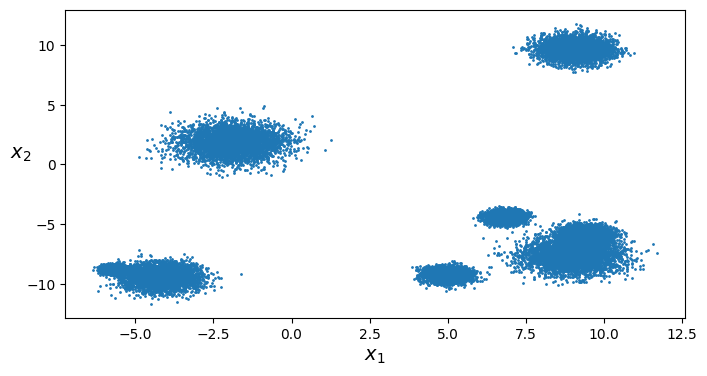

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

###    
* Modificar y adecuar todos los códigos para su respectivo aplicación y demostración de la efectividad del modelo.

In [ ]:
from sklearn.cluster import KMeans

k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([6, 0, 5, ..., 7, 1, 5], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-1.8924915 ,  1.83385122],
       [ 8.93770537, -7.85554135],
       [-5.58569114, -8.80122523],
       [ 9.06117281,  9.66438963],
       [ 4.96775929, -9.226538  ],
       [ 6.85534786, -4.39417163],
       [ 9.40398344, -5.93532846],
       [-4.0700964 , -9.46708513]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5],[0.5, 5.1]])
kmeans.predict(X_new)

array([0, 0, 0, 0, 0], dtype=int32)

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

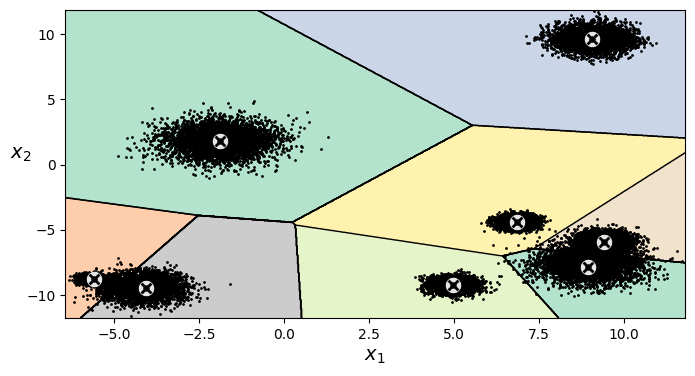

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

En lugar de asignar un grupo a cada muestra (hard clustering) se le puede asignar una puntuación (soft clustering) en función de su distancia al centroide.

In [ ]:
kmeans.transform(X_new)

array([[ 1.8997709 , 13.30467108, 12.16003339, 11.86792826, 12.27655439,
         9.37449866, 12.30464718, 12.16797954],
       [ 4.89531188, 11.50600019, 13.79784617,  9.77142182, 11.39768538,
         7.46653453, 10.19708006, 13.4714626 ],
       [ 1.60825311, 16.13541408, 12.08117195, 13.77991215, 14.59360886,
        12.32078145, 15.28721361, 12.51292604],
       [ 1.2924122 , 15.80335553, 11.59325194, 14.02855547, 14.17733689,
        12.02736396, 15.00045238, 12.01483387],
       [ 4.04867181, 15.46094834, 15.17496951,  9.70192418, 15.00701716,
        11.42496133, 14.17954144, 15.26714611]])


En funcion del estado inicial el algoritmo puede llegar a una solución u otra el ultimo estado inicial lo dejamos sin declarar para que se use el por defecto que tiene skylearn, debido a que estamos trabajando con un data generado aleatoriamente

In [ ]:
kmeans_iter1 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="lloyd", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="lloyd", max_iter=3, random_state=1)
kmeans_iter4 = KMeans(n_clusters=8, init="random", n_init=1,
                     algorithm="lloyd", max_iter=4, random_state=1)
kmeans_iter5 = KMeans(n_clusters=8, init="random",
                     algorithm="elkan", max_iter=2000, random_state=1)



kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)
kmeans_iter4.fit(X)
kmeans_iter5.fit(X)

KMeans(algorithm='elkan', init='random', max_iter=2000, random_state=1)

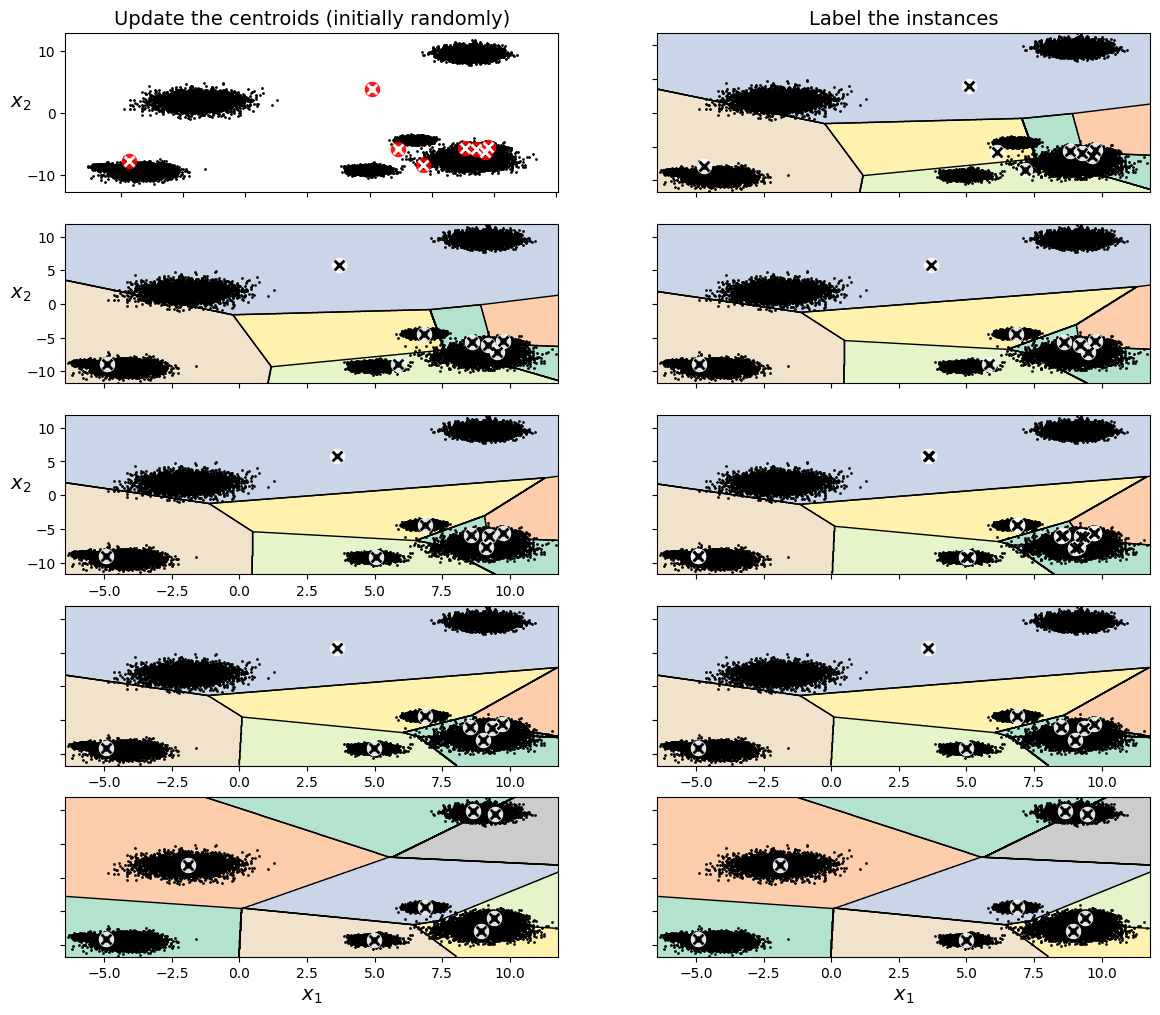

In [ ]:
plt.figure(figsize=(14, 12))  # Tamaño más grande para acomodar 8 subgráficos

# Gráfico 1: Centroides iniciales aleatorios
plt.subplot(521)  # 4 filas, 2 columnas, primer gráfico
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

# Gráfico 2: Fronteras de decisión con kmeans_iter1
plt.subplot(522)  # 4 filas, 2 columnas, segundo gráfico
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

# Gráfico 3: Fronteras de decisión con kmeans_iter2
plt.subplot(523)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

# Gráfico 4: Fronteras de decisión con kmeans_iter2
plt.subplot(524)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

# Gráfico 5: Fronteras de decisión con kmeans_iter3
plt.subplot(525)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

# Gráfico 6: Fronteras de decisión con kmeans_iter3
plt.subplot(526)
plot_decision_boundaries(kmeans_iter3, X, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter4.cluster_centers_)

# **Nuevo Gráfico 7: Fronteras de decisión con kmeans_iter4**
plt.subplot(527)
plot_decision_boundaries(kmeans_iter4, X, show_ylabels=False)

# **Nuevo Gráfico 8: Fronteras finales sin centroides con kmeans_iter4**
plt.subplot(528)
plot_decision_boundaries(kmeans_iter4, X, show_ylabels=False)


# **Nuevo Gráfico 9: Fronteras de decisión con kmeans_iter4**
plt.subplot(529)
plot_decision_boundaries(kmeans_iter5, X, show_ylabels=False)

# **Nuevo Gráfico 10: Fronteras finales sin centroides con kmeans_iter4**
plt.subplot(5, 2, 10)
plot_decision_boundaries(kmeans_iter5, X, show_ylabels=False)

plt.show()


Aqui demostramos mejor eso

In [ ]:
#Esta es una funcion para graficar que usaremos una casilla mas abajo
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

**random_state**: Asegura que la inicialización sea reproducible con diferentes números semilla (11 y 19), por lo que los centroides iniciales en cada ejecución serán diferentes.

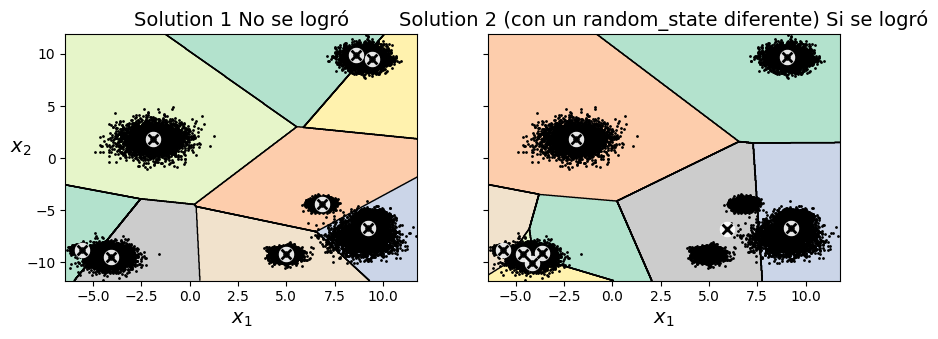

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=8, init="random", n_init=1,
                         algorithm="lloyd", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=8, init="random", n_init=1,
                         algorithm="lloyd", random_state=41)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1 No se logró", "Solution 2 (con un random_state diferente) Si se logró")

plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece Scikit-Learn por defecto.

Para que quede por defecto solo no declaramos **n_init =**

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=8, init="random",# n_init = 1,
                              algorithm="lloyd", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', random_state=11)

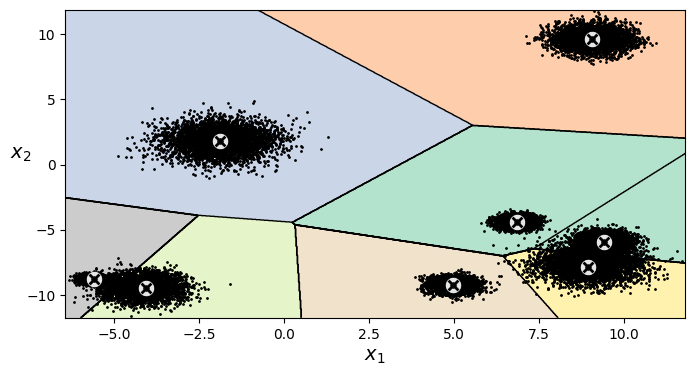

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Sabemos que en numero de grupos optimo (cantidad de y's) no los conocemos por lo que debemos encontrarlo:

### Encontrando el número óptimo de grupos

Como hemos visto anteriormente, el número de grupos o clusters es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el silhouette score, que se basa en calcular el coeficiente de silueta (silhouette coefficient) de todas las muestras del dataset como  (b−a)/max(a,b)  donde  a  es la distancia mínima al resto de muestras del mismo grupo y  b  es la distancia media de los grupos más cercanos. Su valor se encuentra entre  1  y  −1 .

*  Un valor cercano a  1  indica que la muestra está bien metida en su grupo y lejos de los demás
*  Un valor cercano a  0  indica que la muestra se encuentra cerca de una frontera de decisión
*  Un valor cercano a  −1  indica que la muestra está en el grupo incorrecto

In [ ]:
from sklearn.metrics import silhouette_score
#coeficiente de silueta
silhouette_score(X, kmeans.labels_)

0.7171817816078386

Calculando la métrica para diferentes números de clusters podemos encontrar el valor óptimo.

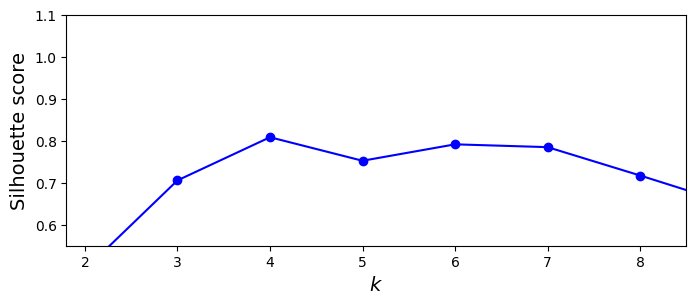

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 1.1])
plt.show()

## Diagramas de silueta
También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

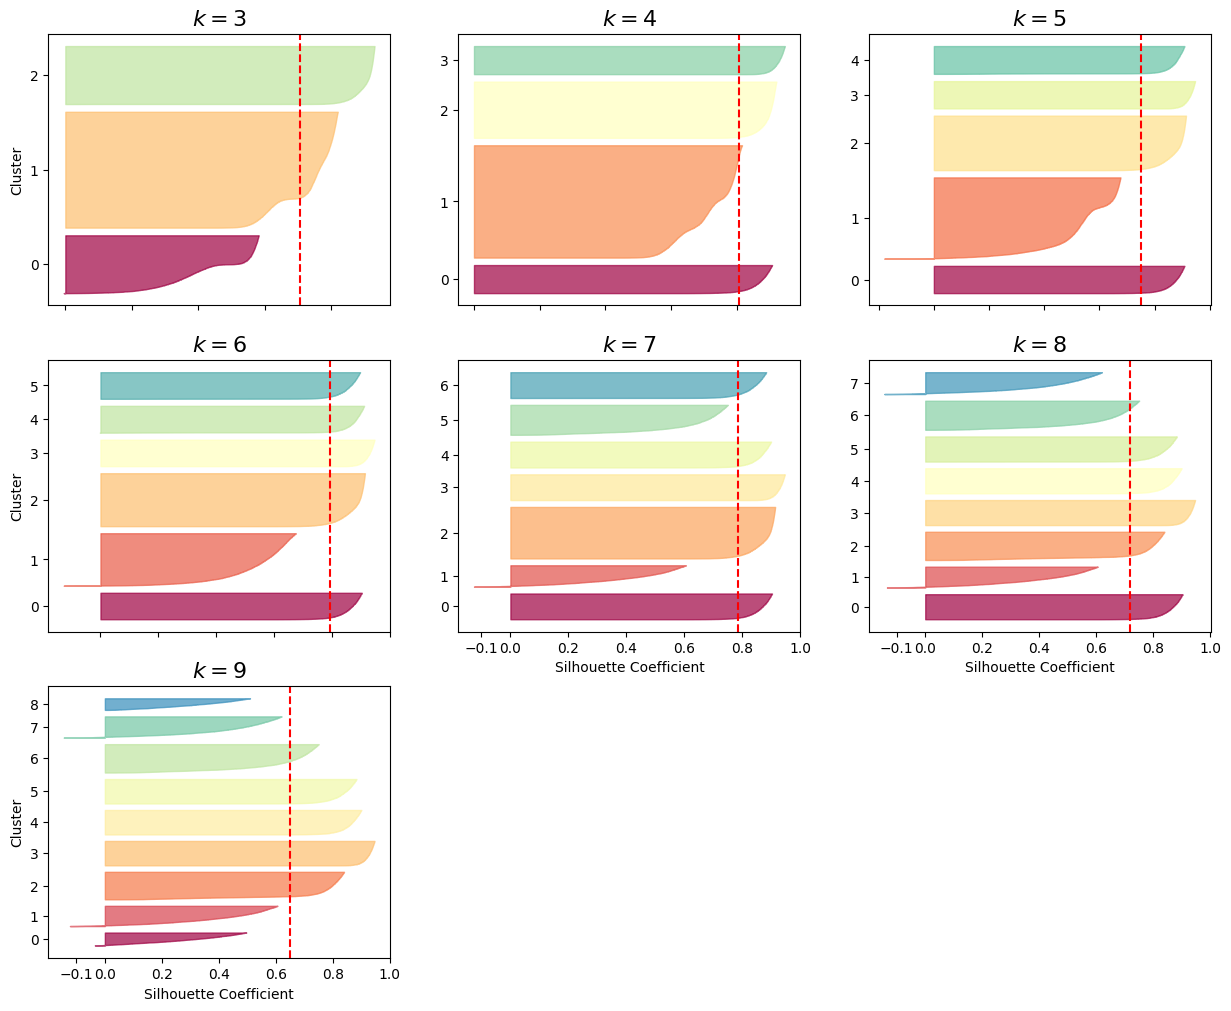

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(15, 12))  # AUMENTÉ EL TAMAÑO DE LA FIGURA PARA ADAPTAR MÁS SUBGRÁFICOS

# CAMBIÉ EL RANGO DEL BUCLE PARA GRAFICAR DESDE k = 3 HASTA k = 9
for k in range(3, 10):  # MODIFICADO: RANGE(3, 10) PARA INCLUIR k=3 HASTA k=9
    plt.subplot(3, 3, k - 2)  # MODIFICADO: 3 FILAS Y 3 COLUMNAS DE SUBGRÁFICOS

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 6, 9):  # MODIFICADO: INCLUÍ k=9 PARA GRAFICAR
        plt.ylabel("Cluster")

    if k in (7, 8, 9):  # MODIFICADO: INCLUÍ k=7, k=8, k=9 PARA MOSTRAR ETIQUETAS EN X
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()
